# Dataset avazu-ctr-prediction

In [ ]:
# Downloading awazu dataset from kaggle
!pip install kaggle

!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c avazu-ctr-prediction

!unzip /avazu-ctr-prediction.zip -d /avazu-ctr-prediction

Loading requiered libraries.

In [ ]:
!pip install scikit-learn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

Lets check the sape of dataset : 28 columns and 40M rows

# Exploratory Data Analysis

Randomly selecting 1M samples from 40M data

In [10]:
df_train = pd.read_csv('avazu-ctr-prediction/train.gz', compression='gzip', header=0).sample(n=500000, random_state=42)

df_train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
12769793,1.219830e+19,0,14102319,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,1,0,20277,320,50,2281,3,47,100182,42
15396835,6.333857e+18,0,14102413,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,-1,79
27744148,1.297881e+19,0,14102805,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,20108,320,50,2299,2,1327,100084,52
34369722,6.644525e+18,0,14102911,1005,0,85f751fd,c4e18dd6,50e219e0,1a32e234,2347f47a,...,1,0,20170,300,50,2312,0,167,100079,16
31917930,4.572864e+18,0,14102820,1005,0,85f751fd,c4e18dd6,50e219e0,3e2bf98d,2347f47a,...,1,2,22955,320,50,2655,2,38,-1,23


In [11]:
df_train.shape

(500000, 24)

**Data fields**
* id: ad identifier
* click: 0/1 for non-click/click
* hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, * 2014 UTC.
* C1 -- anonymized categorical variable
* banner_pos
* site_id
* site_domain
* site_category
* app_id
* app_domain
* app_category
* device_id
* device_ip
* device_model
* device_type
* device_conn_type
* C14-C21 -- anonymized categorical variables

In [12]:
print(df_train.shape)

print(df_train.columns)

(500000, 24)
Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')


In [13]:
df_train.dtypes

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object

In [14]:
# statistics
df_train.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,5.000000e+05,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,9.231855e+18,0.170012,1.410256e+07,1004.970554,0.288350,1.016304,0.330144,18837.701336,318.834416,60.057072,2112.142060,1.431460,227.884000,53210.384042,83.410702
std,5.327286e+18,0.375644,2.965938e+02,1.101552,0.504794,0.530350,0.852748,4964.015390,21.437584,47.188074,609.714453,1.327231,351.909702,49957.167692,70.340205
min,3.358329e+13,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,4.613914e+18,0.000000,1.410230e+07,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.239191e+18,0.000000,1.410260e+07,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000
75%,1.384927e+19,0.000000,1.410281e+07,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100084.000000,101.000000
max,1.844664e+19,1.000000,1.410302e+07,1012.000000,7.000000,5.000000,5.000000,24044.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000


**Outlier detection** vizualization of 'C15', 'C16', 'C19', 'C21' columns 

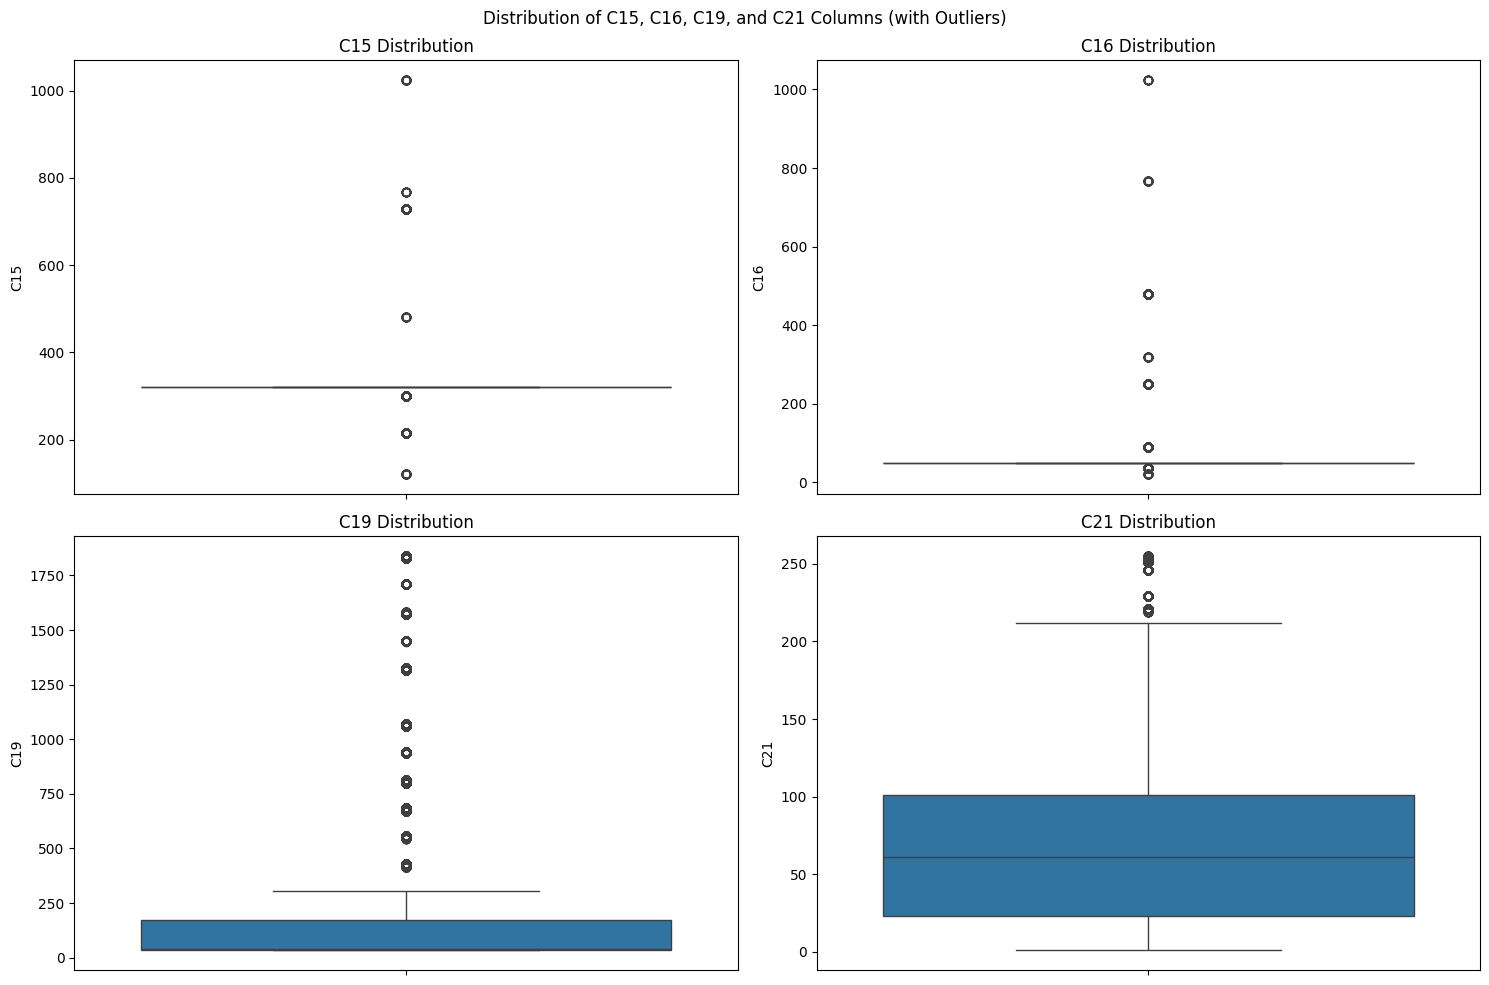

In [15]:
# vizualization of 'C15', 'C16', 'C19', 'C21' columns 
# Create subplots for each column
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of C15, C16, C19, and C21 Columns (with Outliers)')

# Plot boxplots for each column to better visualize outliers
sns.boxplot(data=df_train, y='C15', ax=axes[0,0])
axes[0,0].set_title('C15 Distribution')

sns.boxplot(data=df_train, y='C16', ax=axes[0,1])
axes[0,1].set_title('C16 Distribution')

sns.boxplot(data=df_train, y='C19', ax=axes[1,0])
axes[1,0].set_title('C19 Distribution')

sns.boxplot(data=df_train, y='C21', ax=axes[1,1])
axes[1,1].set_title('C21 Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [16]:
df_train.isnull().sum().sum()

np.int64(0)

The data is imbalanced 

In [17]:
df_train.click.value_counts()

click
0    414994
1     85006
Name: count, dtype: int64

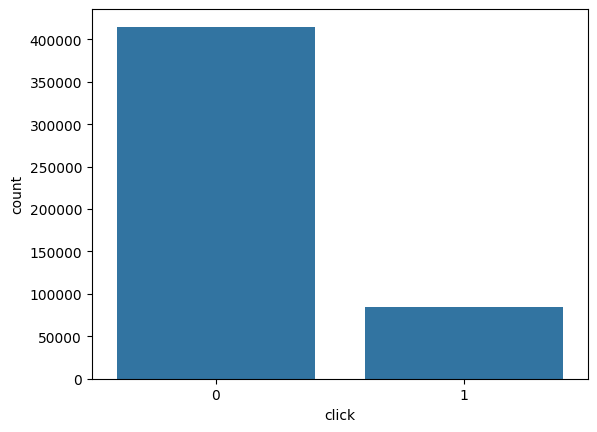

In [18]:
sns.countplot(x='click', data=df_train)
plt.show()

# Feature Engineering

Datetime format is not correct so we can change that to seperate time formats

In [19]:
df_train['hour'] = pd.to_datetime(df_train['hour'], format='%y%m%d%H')
df_train['hour_time'] = df_train['hour'].dt.hour
df_train['day'] = df_train['hour'].dt.day
df_train['month'] = df_train['hour'].dt.month
df_train['day_of_week'] = df_train['hour'].dt.dayofweek

'C15', 'C16', 'C19', 'C21' Columns have outliers

In [20]:
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None


# Dealing with outliers by IQR method
col = ['C15', 'C16', 'C19', 'C21']

#IQR method
for col in col:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    df_train[col][df_train[col] > Q3 + 1.5 * IQR] = Q3 + 1.5 * IQR
    df_train[col][df_train[col] < Q1 - 1.5 * IQR] = Q1 - 1.5 * IQR

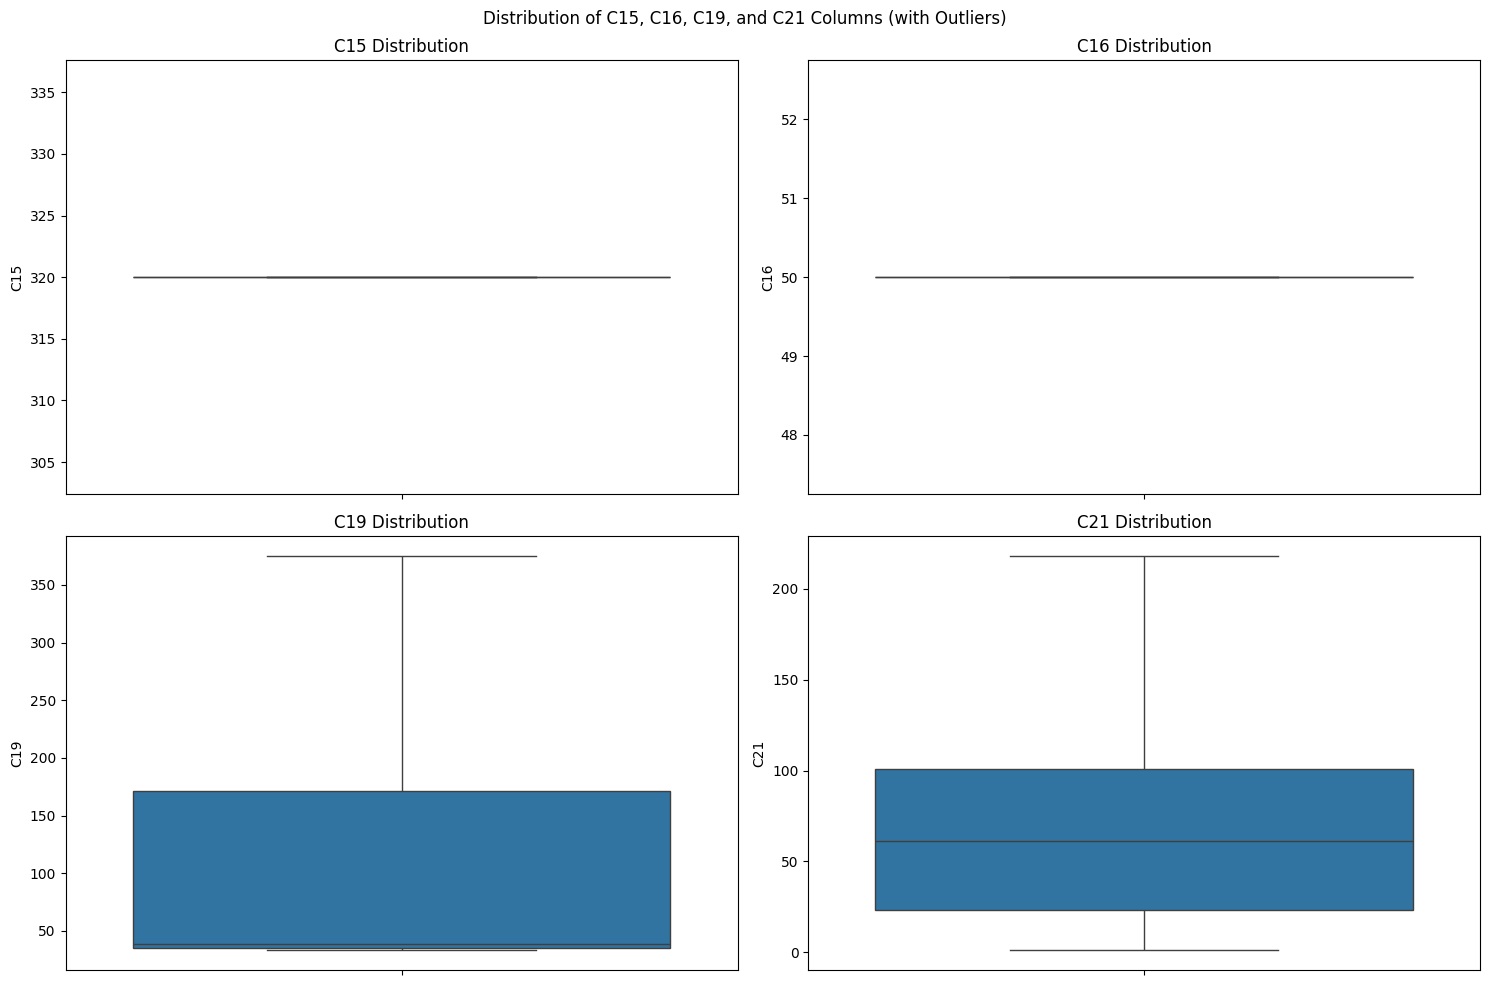

In [21]:
# vizualization of 'C15', 'C16', 'C19', 'C21' columns 
# Create subplots for each column
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of C15, C16, C19, and C21 Columns (with Outliers)')

# Plot boxplots for each column to better visualize outliers
sns.boxplot(data=df_train, y='C15', ax=axes[0,0])
axes[0,0].set_title('C15 Distribution')

sns.boxplot(data=df_train, y='C16', ax=axes[0,1])
axes[0,1].set_title('C16 Distribution')

sns.boxplot(data=df_train, y='C19', ax=axes[1,0])
axes[1,0].set_title('C19 Distribution')

sns.boxplot(data=df_train, y='C21', ax=axes[1,1])
axes[1,1].set_title('C21 Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**segrigating numerical and categorical variables.**

In [22]:
numerical = []
categorical = []

for col in (df_train.columns):
    if df_train[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ",numerical)
print("\ncategorical columns = ",categorical)

numerical columns =  ['id', 'click', 'hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_time', 'day', 'month', 'day_of_week']

categorical columns =  ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


**unique values are too much selection is labelencoder**

In [23]:
print("unique counts of site_id", len(df_train['site_id'].unique()))
print("unique counts of site_domain", len(df_train['site_domain'].unique()))
print("unique counts of site_category", len(df_train['site_category'].unique()))
print("unique counts of app_id", len(df_train['app_id'].unique()))
print("unique counts of app_domain", len(df_train['app_domain'].unique()))
print("unique counts of app_category", len(df_train['app_category'].unique()))
print("unique counts of device_id", len(df_train['device_id'].unique()))
print("unique counts of device_ip", len(df_train['device_ip'].unique()))
print("unique counts of device_model", len(df_train['device_model'].unique()))

unique counts of site_id 2266
unique counts of site_domain 2263
unique counts of site_category 22
unique counts of app_id 2465
unique counts of app_domain 161
unique counts of app_category 27
unique counts of device_id 79672
unique counts of device_ip 314055
unique counts of device_model 4533


```
from the 1M data samples there are max device_IP and they are 0.3M so we store them for now
```

In [24]:
#Label encoder
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for each categorical column
label_encoders = {}

# Apply label encoding to all categorical columns
for col in categorical:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le
    print(f"Label encoded {col}: {len(le.classes_)} unique values")

print("\nLabel encoding completed for all categorical variables")

Label encoded site_id: 2266 unique values
Label encoded site_domain: 2263 unique values
Label encoded site_category: 22 unique values
Label encoded app_id: 2465 unique values
Label encoded app_domain: 161 unique values
Label encoded app_category: 27 unique values
Label encoded device_id: 79672 unique values
Label encoded device_ip: 314055 unique values
Label encoded device_model: 4533 unique values

Label encoding completed for all categorical variables


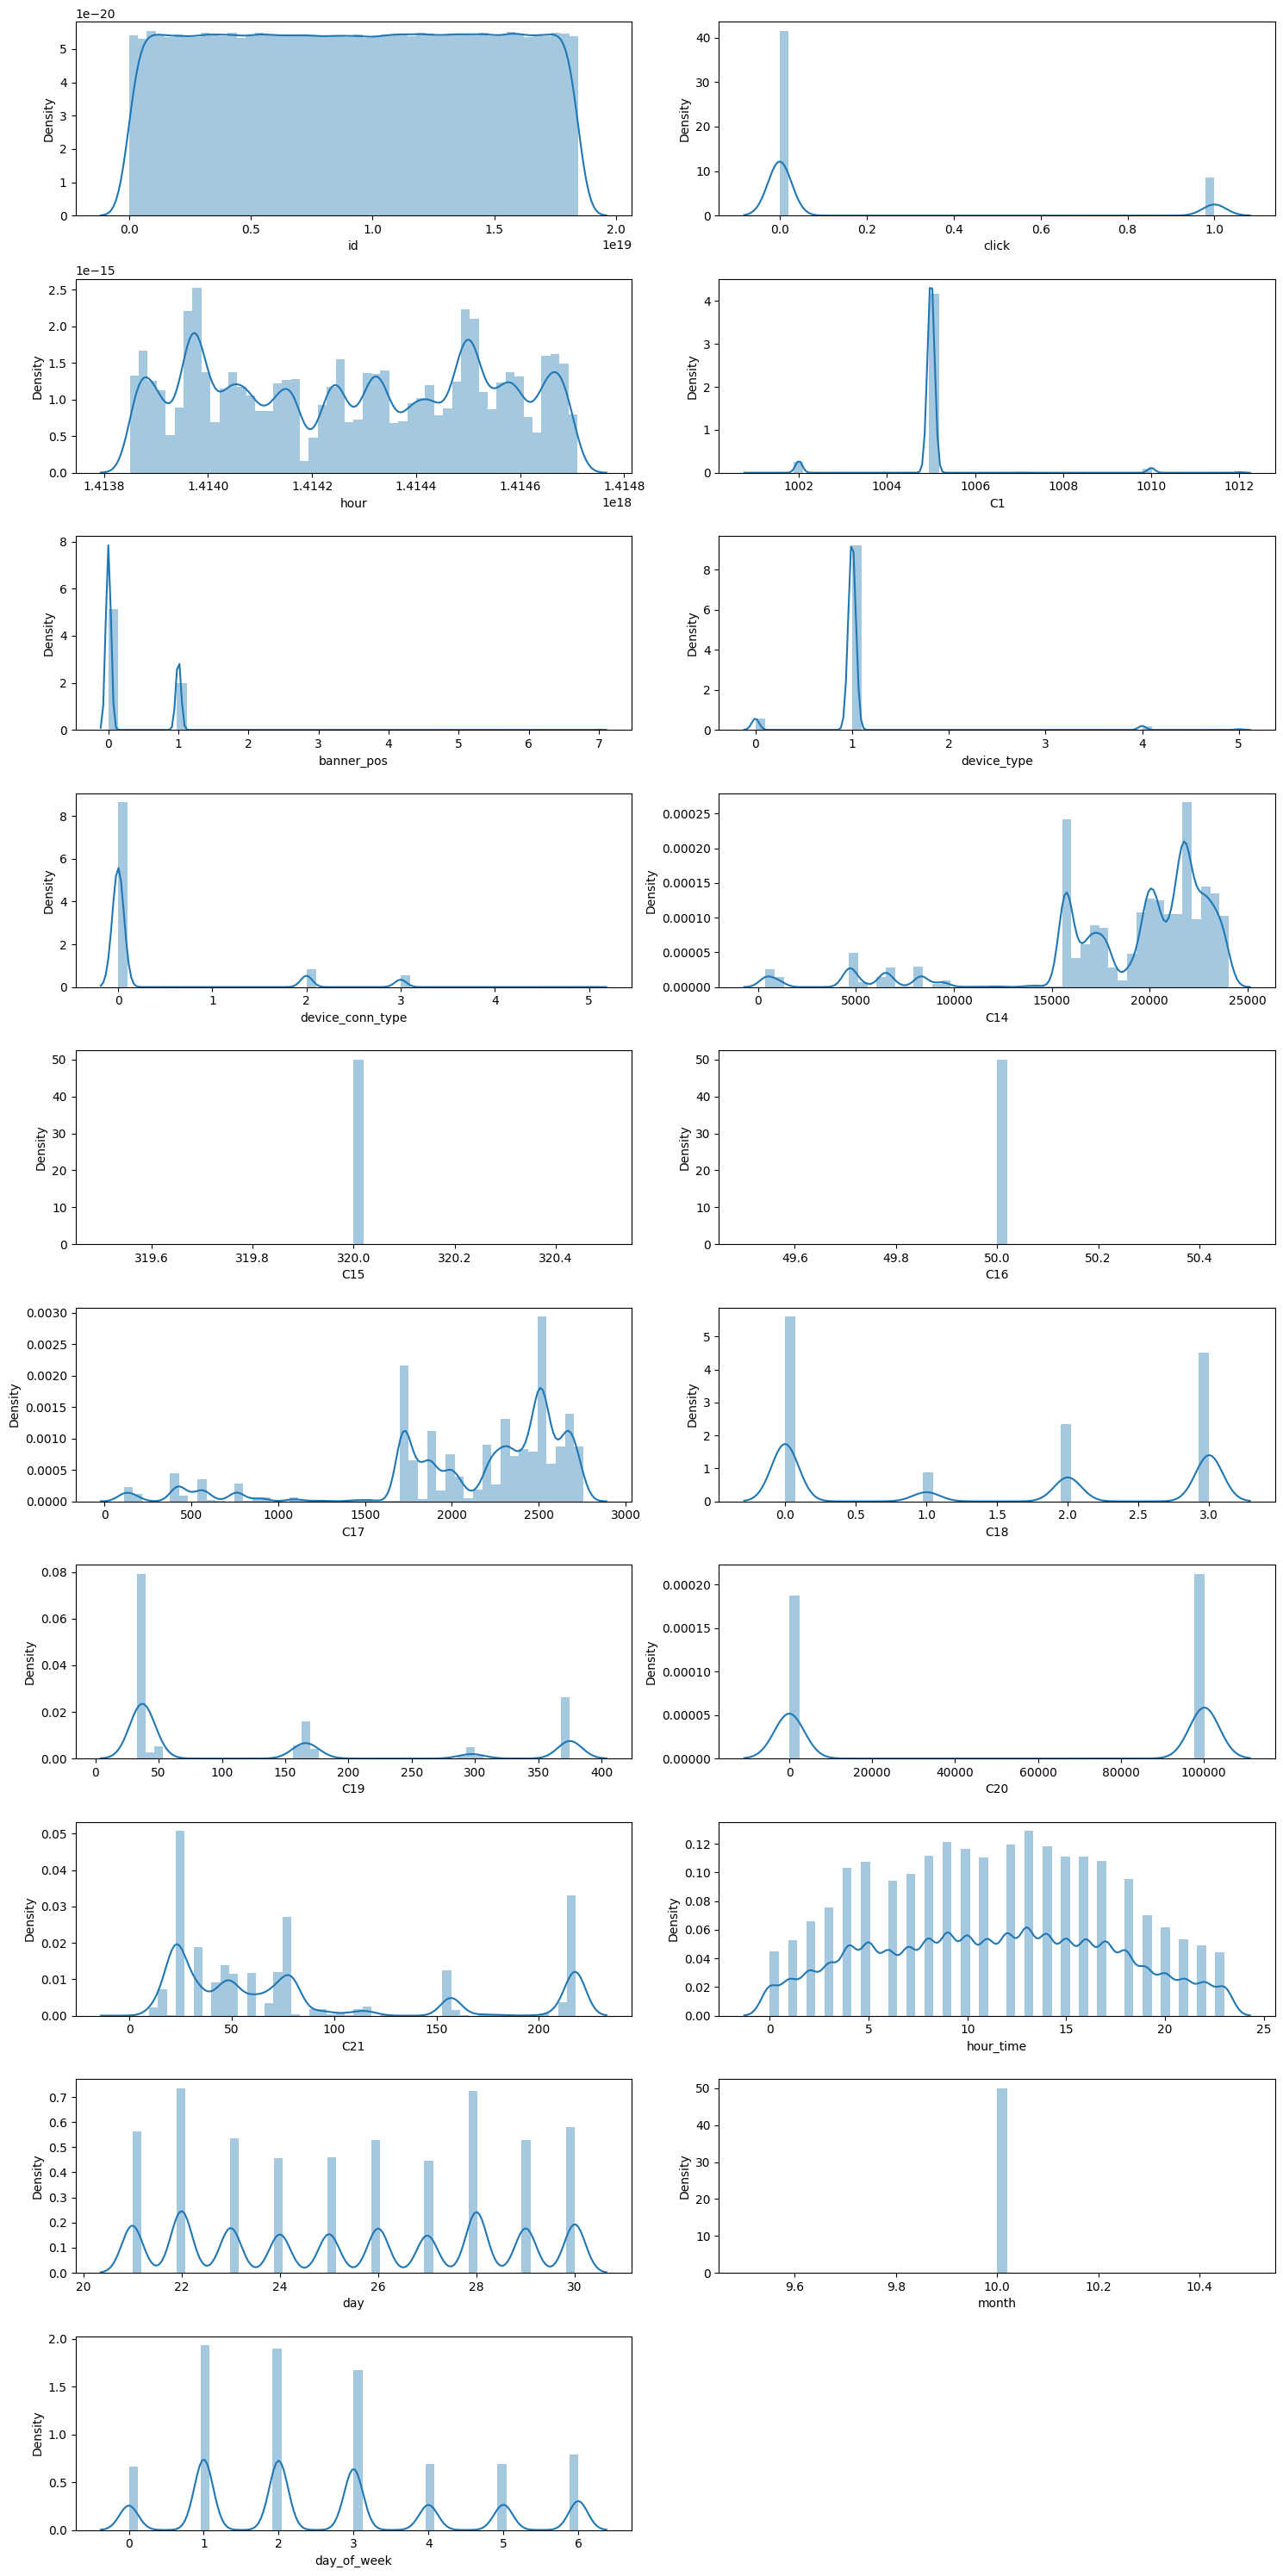

In [25]:
import math
# The code below will plot histograms for all numerical columns 

n = 2
plt.figure(figsize=[15,3*math.ceil(len(numerical)/n)])

for i in range(len(numerical)):
    plt.subplot(math.ceil(len(numerical)/n),n,i+1)
    sns.distplot(df_train[numerical[i]])

plt.tight_layout()
plt.show()

## Observations
* C15, C16, columsn has only same value. so they does not give any information about the prediction. tey are going to be deleted
* all the data recorded in same month


Text(0.5, 1.05, 'Correlation Matrix')

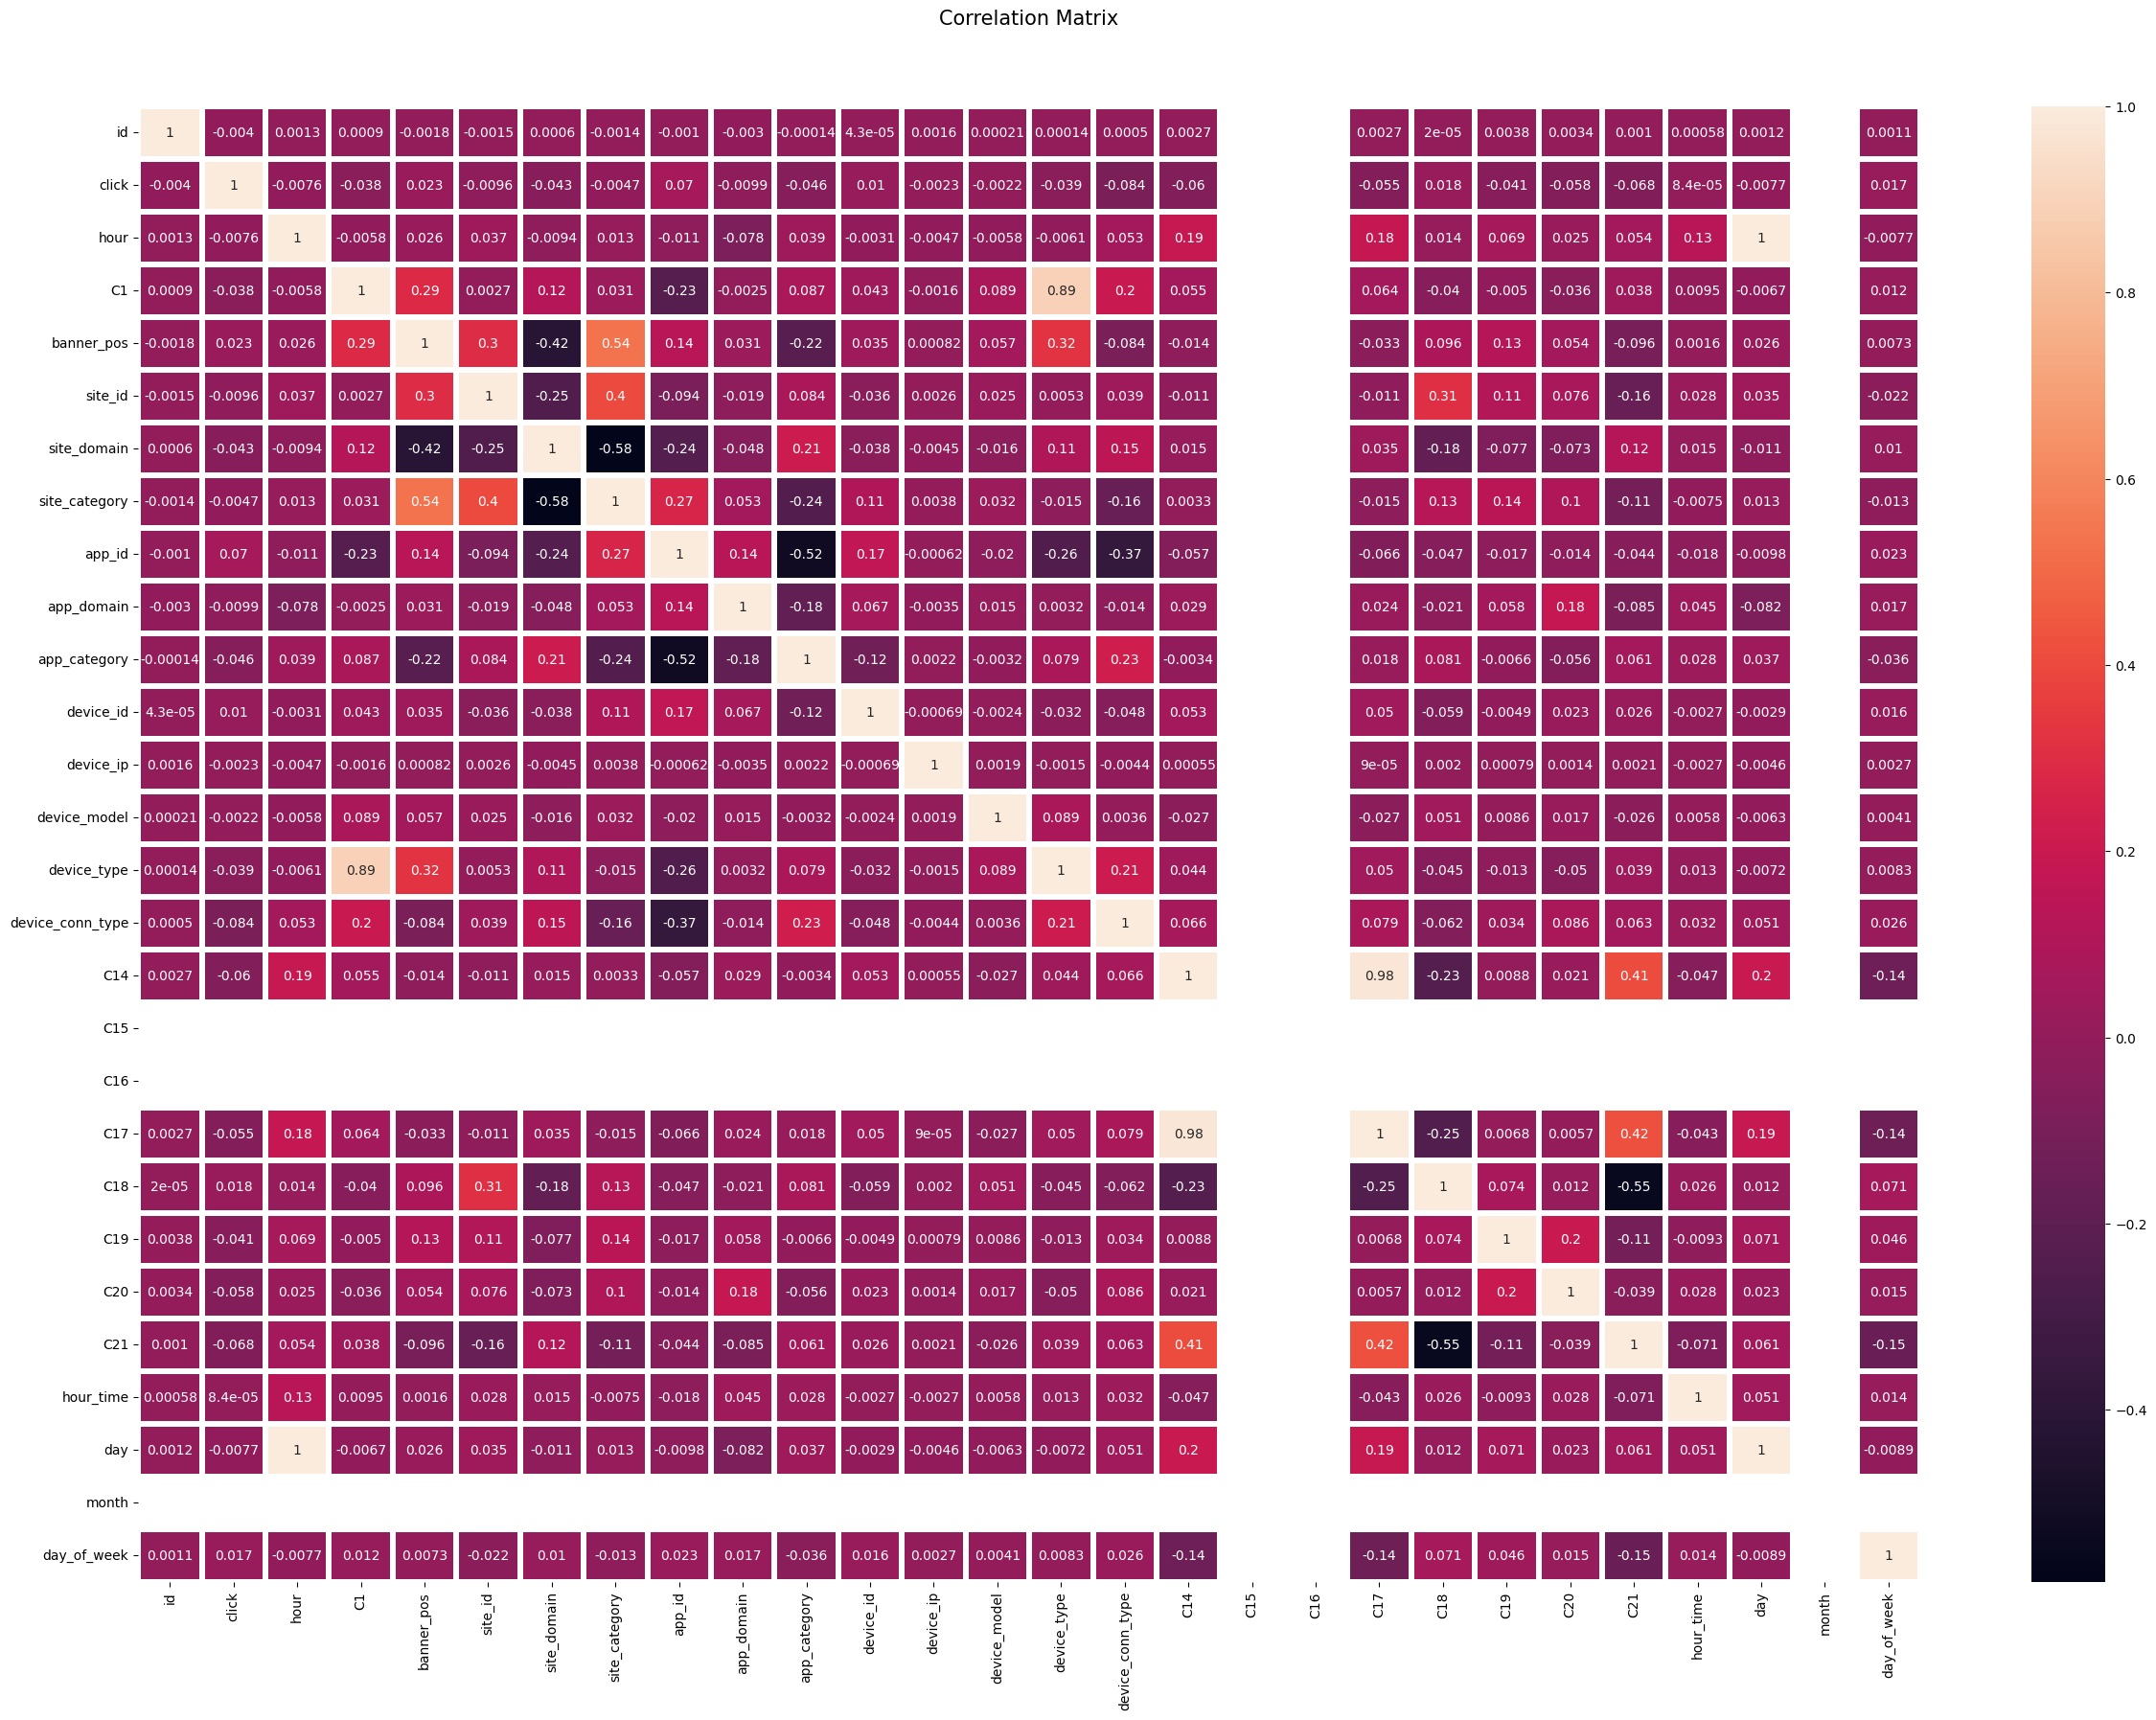

In [26]:
corr = df_train.corr()
f, ax = plt.subplots(figsize=(30,20))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3)
plt.title("Correlation Matrix", y=1.05, size=15)

observation
* C15, C16, month are same values so they needs to be deleted
* C14 and C17 high corelation (98%)
* device_type and C1 has high corelation (89%)
* day and hour has 1 corelation (100%)


In [27]:
cols_to_drop = ['id','C15', 'C16', 'month','C17', 'hour']
df_train = df_train.drop(cols_to_drop, axis=1)

df_train.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_type,device_conn_type,C14,C18,C19,C20,C21,hour_time,day,day_of_week
12769793,0,1005,0,1185,1760,5,1476,136,3,52782,...,1,0,20277,3,47,100182,42,19,23,3
15396835,0,1005,0,275,2150,1,2285,67,0,52782,...,1,0,15705,0,35,-1,79,13,24,4
27744148,0,1005,0,275,2150,1,2285,67,0,52782,...,1,0,20108,2,375,100084,52,5,28,1
34369722,0,1005,0,1185,1760,5,238,17,3,7776,...,1,0,20170,0,167,100079,16,11,29,2
31917930,0,1005,0,1185,1760,5,585,17,3,54715,...,1,2,22955,2,38,-1,23,20,28,1


# Modeling

#### Evaluation functions

In [28]:

# this function helps in evaluation the given model and provide accuracy and confusion matrix. 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss

def model_eval(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    #print(accuracy)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    #print(cnf_matrix)
    #metrics.plot_confusion_matrix(model, X_test, y_test)
    #plt.show()
    return accuracy, cnf_matrix

# Plots the ROC curve and returns false positive rate, true positive rate, and thresholds. 

def draw_roc(model, Xtest, actual):
    probs = model.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                            drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

# Returns the ctossvalidation score for given number of n folds. 

def cross_val (model, x, y, folds):
    crossvalidation = cross_val_score(model, x, y, cv= folds, n_jobs=-1)
    return crossvalidation

# this stores the results in dataframe for evaluating the final result. 

def store_results(name, ytrain, xtrain, ytest, xtest, model, folds):
    accuracy_test, cm1 =  model_eval(model, xtrain, ytrain)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_test = TP / (TP+FP)
    precision_test = TP / (TP+FN)
    
    # ROC AUC and Log Loss for test set (training data)
    try:
        # Get predicted probabilities for ROC AUC and log loss
        y_prob_test = model.predict_proba(xtrain)[:, 1]
        roc_auc_test = roc_auc_score(ytrain, y_prob_test)
        log_loss_test = log_loss(ytrain, y_prob_test)
    except:
        # Fallback to predictions if predict_proba is not available
        y_pred_test = model.predict(xtrain)
        roc_auc_test = roc_auc_score(ytrain, y_pred_test)
        log_loss_test = np.nan  # Can't compute log loss without probabilities
    
    accuracy_train, cm1 =  model_eval(model, xtest, ytest)
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    recall_train = TP / (TP+FP)
    precision_train = TP / (TP+FN)
    
    # ROC AUC and Log Loss for train set (test data)
    try:
        # Get predicted probabilities for ROC AUC and log loss
        y_prob_train = model.predict_proba(xtest)[:, 1]
        roc_auc_train = roc_auc_score(ytest, y_prob_train)
        log_loss_train = log_loss(ytest, y_prob_train)
    except:
        # Fallback to predictions if predict_proba is not available
        y_pred_train = model.predict(xtest)
        roc_auc_train = roc_auc_score(ytest, y_pred_train)
        log_loss_train = np.nan  # Can't compute log loss without probabilities

    entry = {'Model': [name],
        'Accuracy_train': [accuracy_train],
        'recall_train': [recall_train],
        'precision_train': [precision_train],
        'roc_auc_train': [roc_auc_train],
        'log_loss_train': [log_loss_train],
        'Accuracy_test': [accuracy_test],
        'recall_test': [recall_test],
        'precision_test': [precision_test],
        'roc_auc_test': [roc_auc_test],
        'log_loss_test': [log_loss_test],
        }
    result = pd.DataFrame(entry)
    return result

#### Modelling Data

In [29]:
from sklearn.model_selection import train_test_split
X = df_train.drop(['click'], axis=1)
y = df_train['click']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

### Dummy Model Classifier (80% accuray beacause the dataset is imbalanced)

In [30]:
from sklearn.dummy import DummyClassifier

outcome = pd.DataFrame()
dummy_clf = DummyClassifier(strategy= "most_frequent")
dummy_clf.fit(X_train, y_train)
accuracy, cnf_matrix  = model_eval(dummy_clf, X_train, y_train)
print(accuracy)
print(cnf_matrix)
temp = store_results("Dummy classifier", y_train, X_train, y_test, X_test, dummy_clf, 5)
outcome = pd.concat([outcome, temp], ignore_index=True)
outcome

0.83017
[[332068      0]
 [ 67932      0]]


,Model,Accuracy_train,recall_train,precision_train,roc_auc_train,log_loss_train,Accuracy_test,recall_test,precision_test,roc_auc_test,log_loss_test
0,Dummy classifier,0.82926,NaN,0.0,0.5,6.154093,0.83017,NaN,0.0,0.5,6.121294


## Catboost (85 percent)

In [31]:
from catboost import CatBoostClassifier

# These are the object type columns that represent categorical data
cat_features = ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 
            'app_category', 'device_id', 'device_ip', 'device_model']

catboost_clf = CatBoostClassifier(
    iterations=50,
    learning_rate=0.5,
    task_type='CPU',
    loss_function='Logloss',
    boosting_type='Plain',
    max_ctr_complexity=2,
    depth=6,
)

catboost_clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=10,
)

accuracy, cnf_matrix  = model_eval(catboost_clf, X_train, y_train)
print(accuracy)
print(cnf_matrix)
temp = store_results("Catboost classifier", y_train, X_train, y_test, X_test, catboost_clf, 5)
outcome = pd.concat([outcome, temp], ignore_index=True)
outcome

0:	learn: 0.4679756	test: 0.4661992	best: 0.4661992 (0)	total: 216ms	remaining: 10.6s
10:	learn: 0.4045599	test: 0.4033947	best: 0.4033947 (10)	total: 4.4s	remaining: 15.6s
20:	learn: 0.4021906	test: 0.4014849	best: 0.4014849 (20)	total: 10.2s	remaining: 14s
30:	learn: 0.4008583	test: 0.4004338	best: 0.4004338 (30)	total: 15.2s	remaining: 9.31s
40:	learn: 0.3993742	test: 0.3996357	best: 0.3996357 (40)	total: 20.9s	remaining: 4.58s
49:	learn: 0.3986964	test: 0.3994736	best: 0.3994736 (49)	total: 26.8s	remaining: 0us

bestTest = 0.3994736396
bestIteration = 49

0.8508375
[[329893   2175]
 [ 57490  10442]]


,Model,Accuracy_train,recall_train,precision_train,roc_auc_train,log_loss_train,Accuracy_test,recall_test,precision_test,roc_auc_test,log_loss_test
0,Dummy classifier,0.82926,NaN,0.000000,0.500000,6.154093,0.830170,NaN,0.000000,0.50000,6.121294
1,Catboost classifier,0.83319,0.578884,0.084456,0.746975,0.399474,0.850838,0.827614,0.153713,0.88436,0.322383


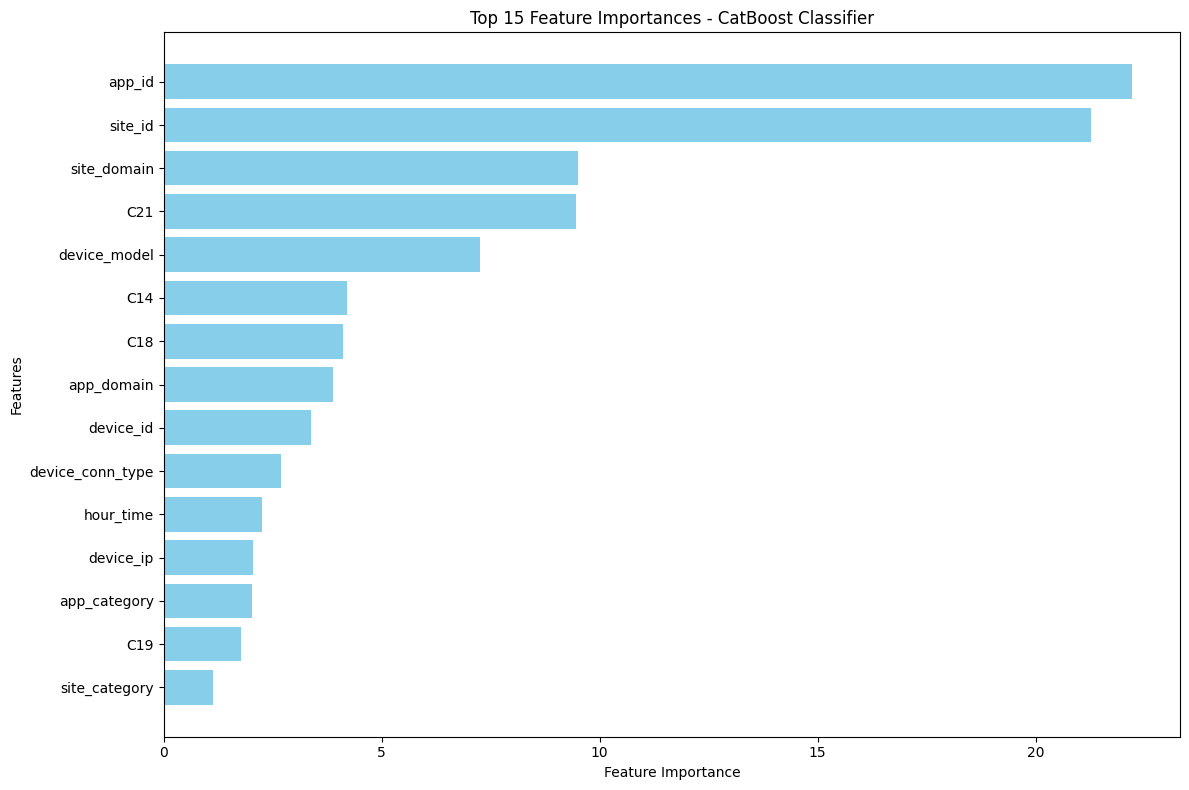

In [32]:
catboost_clf.get_feature_importance(prettified=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance data
feature_importance = catboost_clf.get_feature_importance(prettified=True)

# Create a horizontal bar plot for better readability
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importances'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['Feature Id'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importances - CatBoost Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at top
plt.tight_layout()
plt.show()

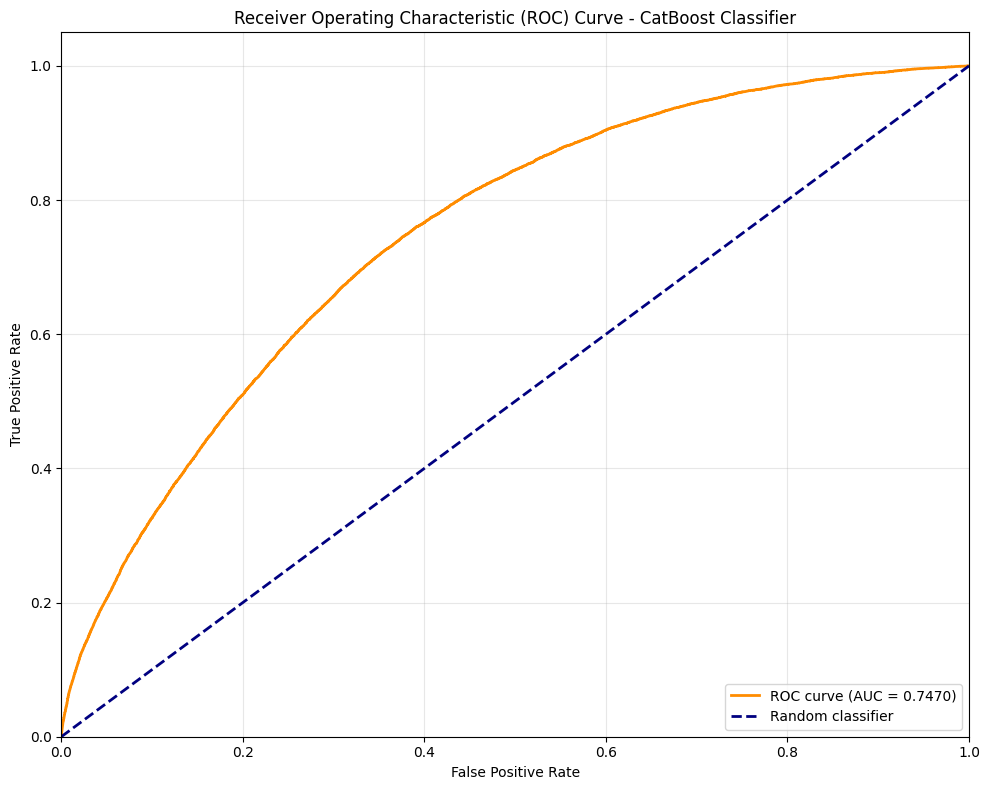

AUC Score: 0.7470


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (click=1)
y_prob = catboost_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Create ROC curve plot
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - CatBoost Classifier')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"AUC Score: {auc_score:.4f}")


## XGBOOST

In [34]:
from xgboost import XGBClassifier

# Create XGBoost classifier with optimized parameters for CTR prediction
xgb_clf = XGBClassifier(
    objective='binary:logistic',     # Binary classification objective
    random_state=42,                 # Random seed for reproducibility
    n_jobs=-1,                       # Use all available cores
    eval_metric='logloss',           # Evaluation metric
    early_stopping_rounds=50,        # Stop if no improvement for 50 rounds
)

# Train the XGBoost model with evaluation set for early stopping
print("Training XGBoost classifier...")
xgb_clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

accuracy, cnf_matrix  = model_eval(xgb_clf, X_train, y_train)
print(accuracy)
print(cnf_matrix)
temp = store_results("XGBOOST classifier", y_train, X_train, y_test, X_test, xgb_clf, 5)
outcome = pd.concat([outcome, temp], ignore_index=True)
outcome

Training XGBoost classifier...
0.83641
[[329106   2962]
 [ 62474   5458]]


,Model,Accuracy_train,recall_train,precision_train,roc_auc_train,log_loss_train,Accuracy_test,recall_test,precision_test,roc_auc_test,log_loss_test
0,Dummy classifier,0.82926,NaN,0.000000,0.500000,6.154093,0.830170,NaN,0.000000,0.500000,6.121294
1,Catboost classifier,0.83319,0.578884,0.084456,0.746975,0.399474,0.850838,0.827614,0.153713,0.884360,0.322383
2,XGBOOST classifier,0.83261,0.580490,0.070751,0.736995,0.404067,0.836410,0.648219,0.080345,0.764917,0.389622


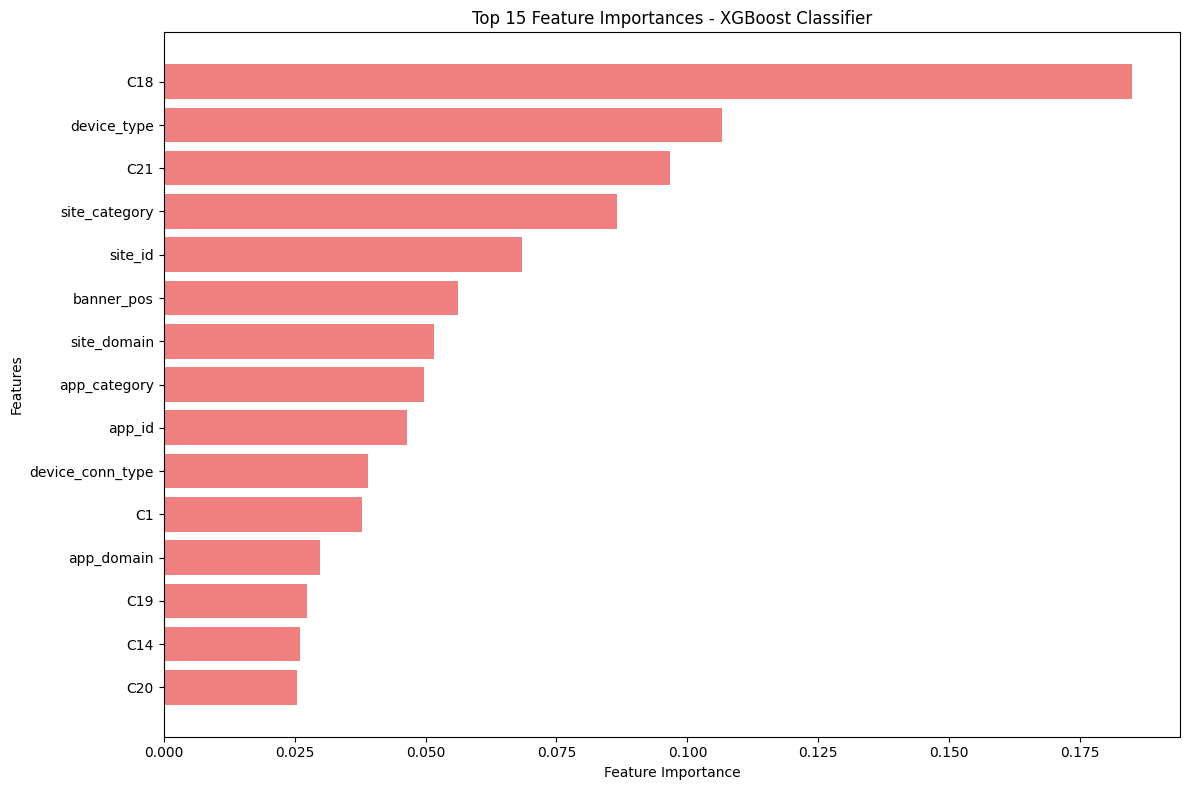

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get XGBoost feature importance data
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]
feature_importance_xgb = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb_clf.feature_importances_
}).sort_values('importance', ascending=False)

# Create a horizontal bar plot for better readability
plt.figure(figsize=(12, 8))
top_features_xgb = feature_importance_xgb.head(15)
plt.barh(range(len(top_features_xgb)), top_features_xgb['importance'], color='lightcoral')
plt.yticks(range(len(top_features_xgb)), top_features_xgb['feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importances - XGBoost Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at top
plt.tight_layout()
plt.show()

# Imbalanced data handling

## Undersampling

Loading Full dataset

In [ ]:
df_train = pd.read_csv('avazu-ctr-prediction/train.gz', compression='gzip', header=0)

In [111]:
# write undersampling for less class imbalance
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
X = df_train.drop(['click'], axis=1)
y = df_train['click']

# Apply random undersampling to balance the dataset
# This will reduce the majority class (click=0) to match the minority class (click=1)
undersampler = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Combine the undersampled features and target variable back into a single dataset
df_undersampled = X_undersampled.copy()
df_undersampled['click'] = y_undersampled

# Get random 1Million rows from df_undersampled
df_undersampled = df_undersampled.sample(n=2000000, random_state=42)

print(f"Original dataset shape: {X.shape}")
print(f"Undersampled dataset shape: {X_undersampled.shape}")
print(f"Original class distribution:\n{y.value_counts()}")
print(f"Undersampled class distribution:\n{pd.Series(y_undersampled).value_counts()}")

Original dataset shape: (40428967, 23)
Undersampled dataset shape: (13730132, 23)
Original class distribution:
click
0    33563901
1     6865066
Name: count, dtype: int64
Undersampled class distribution:
click
0    6865066
1    6865066
Name: count, dtype: int64


In [78]:
del X_undersampled
del y_undersampled
del df_train

In [113]:
df_undersampled['hour'] = pd.to_datetime(df_undersampled['hour'], format='%y%m%d%H')
df_undersampled['hour_time'] = df_undersampled['hour'].dt.hour
df_undersampled['day'] = df_undersampled['hour'].dt.day
df_undersampled['month'] = df_undersampled['hour'].dt.month
df_undersampled['day_of_week'] = df_undersampled['hour'].dt.dayofweek

In [114]:
# Dealing with outliers by IQR method
col = ['C15', 'C16', 'C19', 'C21']

#IQR method
for col in col:
    Q1 = df_undersampled[col].quantile(0.25)
    Q3 = df_undersampled[col].quantile(0.75)
    IQR = Q3 - Q1
    df_undersampled[col][df_undersampled[col] > Q3 + 1.5 * IQR] = Q3 + 1.5 * IQR
    df_undersampled[col][df_undersampled[col] < Q1 - 1.5 * IQR] = Q1 - 1.5 * IQR

In [81]:
# #Label encoder
# from sklearn.preprocessing import LabelEncoder

# # Initialize label encoders for each categorical column
# label_encoders = {}

# # Apply label encoding to all categorical columns
# for col in categorical:
#     le = LabelEncoder()
#     df_undersampled[col] = le.fit_transform(df_undersampled[col])
#     label_encoders[col] = le
#     print(f"Label encoded {col}: {len(le.classes_)} unique values")

# print("\nLabel encoding completed for all categorical variables")

Label encoded site_id: 3024 unique values
Label encoded site_domain: 3481 unique values
Label encoded site_category: 22 unique values
Label encoded app_id: 3924 unique values
Label encoded app_domain: 240 unique values
Label encoded app_category: 27 unique values
Label encoded device_id: 270842 unique values
Label encoded device_ip: 976224 unique values
Label encoded device_model: 5793 unique values

Label encoding completed for all categorical variables


In [115]:
cols_to_drop = ['id','C15', 'C16', 'month', 'C17', 'hour']
df_undersampled = df_undersampled.drop(cols_to_drop, axis=1)

df_undersampled.head()

,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,device_conn_type,C14,C18,C19,C20,C21,click,hour_time,day,day_of_week
5561582,1005,0,5bcf81a2,9d54950b,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,640d6e22,...,2,21768,0,35,100021,157,0,8,22,2
37654145,1005,0,4bf5bbe2,6b560cc1,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,08f75715,...,0,20345,2,39,-1,23,1,8,30,3
5507525,1005,0,85f751fd,c4e18dd6,50e219e0,66f5e02e,6f7ca2ba,0f2161f8,a99f214a,67c81cd9,...,0,21746,3,41,100160,111,0,7,22,2
7263270,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,a65ecb6d,...,0,21837,0,35,-1,163,1,12,22,2
24416259,1005,1,5b4d2eda,16a36ef3,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,f440da38,...,0,16208,3,167,100079,23,1,5,27,0


In [116]:
from sklearn.model_selection import train_test_split
X = df_undersampled.drop(['click'], axis=1)
y = df_undersampled['click']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

## Dummy model Classifier (50% accuracy)

In [117]:
from sklearn.dummy import DummyClassifier

outcome = pd.DataFrame()
dummy_clf = DummyClassifier(strategy= "most_frequent")
dummy_clf.fit(X_train, y_train)
accuracy, cnf_matrix  = model_eval(dummy_clf, X_train, y_train)
print(accuracy)
print(cnf_matrix)
temp = store_results("Dummy classifier", y_train, X_train, y_test, X_test, dummy_clf, 5)
outcome = pd.concat([outcome, temp], ignore_index=True)
outcome

0.5003125
[[     0 799500]
 [     0 800500]]


,Model,Accuracy_train,recall_train,precision_train,roc_auc_train,log_loss_train,Accuracy_test,recall_test,precision_test,roc_auc_test,log_loss_test
0,Dummy classifier,0.49859,0.49859,1.0,0.5,18.072648,0.500313,0.500313,1.0,0.5,18.010563


## Catboost Balanced

In [118]:
from catboost import CatBoostClassifier

# These are the object type columns that represent categorical data
cat_features = ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 
            'app_category', 'device_id', 'device_ip', 'device_model']

catboost_clf = CatBoostClassifier(
    iterations=50,
    learning_rate=0.5,
    task_type='CPU',
    loss_function='Logloss',
    boosting_type='Plain',
    max_ctr_complexity=2,
    depth=6,
)

catboost_clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=10,
)

accuracy, cnf_matrix  = model_eval(catboost_clf, X_train, y_train)
print(accuracy)
print(cnf_matrix)
temp = store_results("Catboost classifier Balanced Data", y_train, X_train, y_test, X_test, catboost_clf, 5)
outcome = pd.concat([outcome, temp], ignore_index=True)
outcome

0:	learn: 0.6245664	test: 0.6230951	best: 0.6230951 (0)	total: 2.89s	remaining: 2m 21s
10:	learn: 0.5904364	test: 0.5846875	best: 0.5846875 (10)	total: 11.1s	remaining: 39.5s
20:	learn: 0.5874405	test: 0.5813490	best: 0.5813490 (20)	total: 16.2s	remaining: 22.4s
30:	learn: 0.5848460	test: 0.5788171	best: 0.5788171 (30)	total: 22.1s	remaining: 13.5s
40:	learn: 0.5831819	test: 0.5770601	best: 0.5770601 (40)	total: 29.5s	remaining: 6.48s
49:	learn: 0.5819893	test: 0.5758735	best: 0.5758735 (49)	total: 35.2s	remaining: 0us

bestTest = 0.5758734559
bestIteration = 49

0.823505
[[605996 193504]
 [ 88888 711612]]


,Model,Accuracy_train,recall_train,precision_train,roc_auc_train,log_loss_train,Accuracy_test,recall_test,precision_test,roc_auc_test,log_loss_test
0,Dummy classifier,0.498590,0.498590,1.000000,0.500000,18.072648,0.500313,0.500313,1.000000,0.500000,18.010563
1,Catboost classifier Balanced Data,0.695155,0.670661,0.763528,0.761344,0.575873,0.823505,0.786211,0.888959,0.907772,0.433857


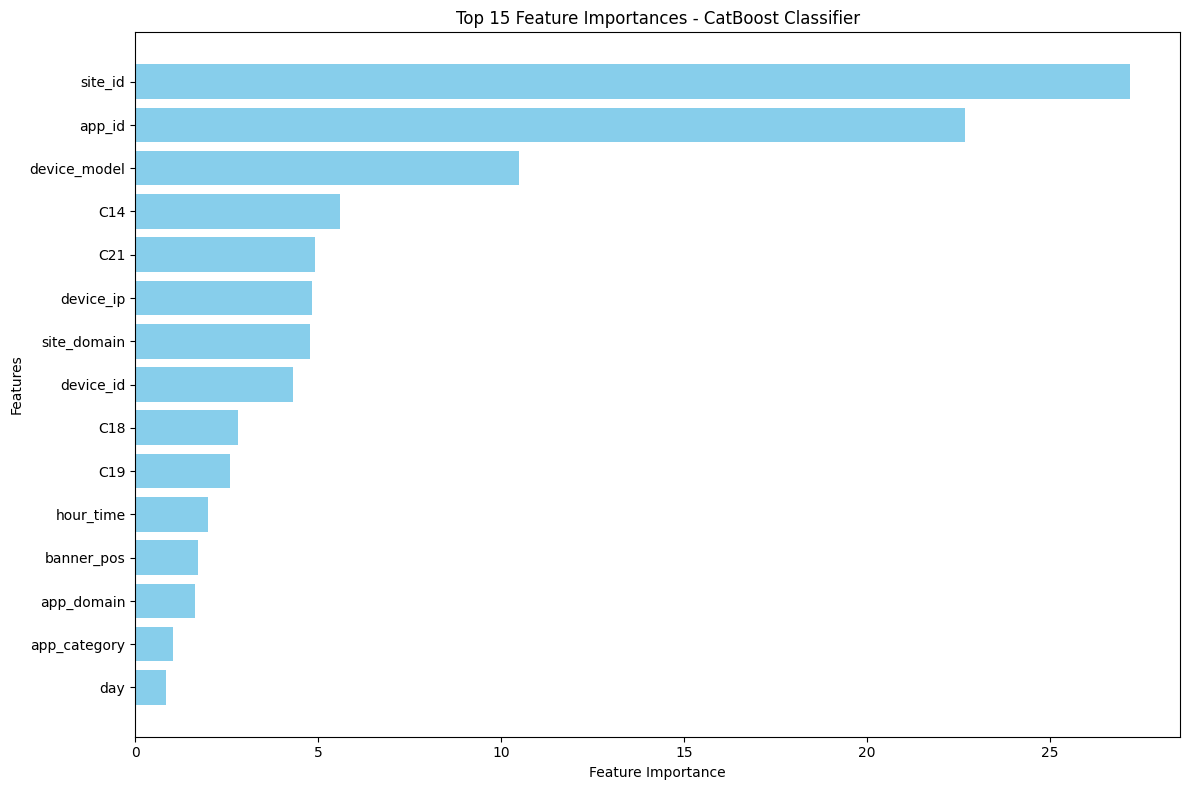

In [119]:
catboost_clf.get_feature_importance(prettified=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance data
feature_importance = catboost_clf.get_feature_importance(prettified=True)

# Create a horizontal bar plot for better readability
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importances'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['Feature Id'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importances - CatBoost Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at top
plt.tight_layout()
plt.show()

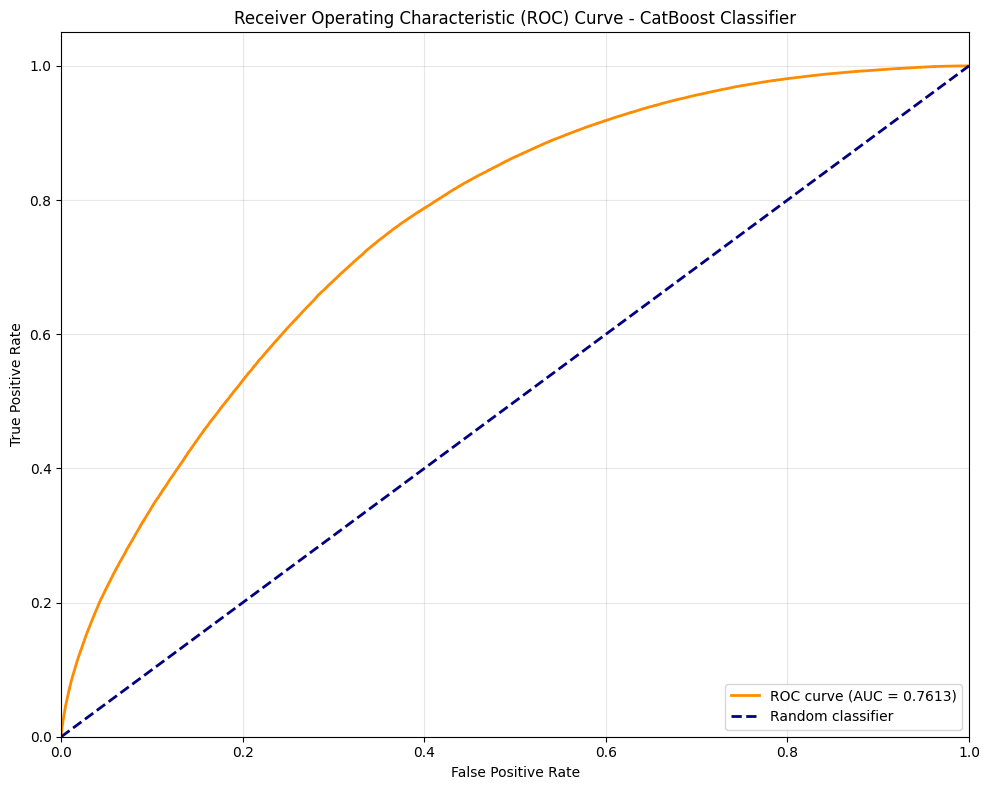

AUC Score: 0.7613


In [87]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (click=1)
y_prob = catboost_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Create ROC curve plot
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - CatBoost Classifier')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"AUC Score: {auc_score:.4f}")

## XGBoost balanced data

In [122]:
from xgboost import XGBClassifier

# Create copies of the data for XGBoost (since it can't handle object type categorical columns)
X_train_xgb = X_train.copy()
X_test_xgb = X_test.copy()

# Define categorical columns that need to be converted
categorical_columns = ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 
                    'app_category', 'device_id', 'device_ip', 'device_model']

# Convert categorical columns to category dtype for XGBoost
print("Converting categorical columns for XGBoost compatibility...")
for col in categorical_columns:
    if col in X_train_xgb.columns:
        # Convert to category dtype to enable XGBoost categorical support
        X_train_xgb[col] = X_train_xgb[col].astype('category')
        X_test_xgb[col] = X_test_xgb[col].astype('category')
        print(f"Converted {col} to category dtype")

# Create XGBoost classifier with optimized parameters for CTR prediction
xgb_clf = XGBClassifier(
    objective='binary:logistic',     # Binary classification objective
    random_state=42,                 # Random seed for reproducibility
    n_jobs=-1,                       # Use all available cores
    eval_metric='logloss',           # Evaluation metric
    early_stopping_rounds=50,        # Stop if no improvement for 50 rounds
    enable_categorical=True          # Enable categorical feature support
)

# Train the XGBoost model with evaluation set for early stopping
print("Training XGBoost classifier...")
xgb_clf.fit(
    X_train_xgb, y_train,
    eval_set=[(X_test_xgb, y_test)],
    verbose=False
)

accuracy, cnf_matrix  = model_eval(xgb_clf, X_train_xgb, y_train)
print(accuracy)
print(cnf_matrix)
temp = store_results("XGBOOST classifier Balanced Data", y_train, X_train_xgb, y_test, X_test_xgb, xgb_clf, 5)
outcome = pd.concat([outcome, temp], ignore_index=True)
outcome

Converting categorical columns for XGBoost compatibility...
Converted site_id to category dtype
Converted site_domain to category dtype
Converted site_category to category dtype
Converted app_id to category dtype
Converted app_domain to category dtype
Converted app_category to category dtype
Converted device_id to category dtype
Converted device_ip to category dtype
Converted device_model to category dtype
Training XGBoost classifier...
0.648405
[[442276 357224]
 [205328 595172]]


,Model,Accuracy_train,recall_train,precision_train,roc_auc_train,log_loss_train,Accuracy_test,recall_test,precision_test,roc_auc_test,log_loss_test
0,Dummy classifier,0.498590,0.498590,1.000000,0.500000,18.072648,0.500313,0.500313,1.000000,0.500000,18.010563
1,Catboost classifier Balanced Data,0.695155,0.670661,0.763528,0.761344,0.575873,0.823505,0.786211,0.888959,0.907772,0.433857
2,XGBOOST classifier Balanced Data,0.576605,0.568845,0.623072,0.597559,0.681548,0.648405,0.624921,0.743500,0.714968,0.632764


# Hyperparameter Tuning on Catboost with Optuna

In [ ]:
!pip install optuna

In [124]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

# These are the object type columns that represent categorical data
cat_features = ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 
            'app_category', 'device_id', 'device_ip', 'device_model']

def objective(trial):
    """
    Objective function for Optuna hyperparameter optimization.
    This function will be called for each trial to evaluate different hyperparameter combinations.
    """
    # Define hyperparameter search space
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10, log=True),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10, log=True),
        'task_type': 'CPU',
        'loss_function': 'Logloss',
        'eval_metric': 'AUC',
        'random_state': 42,
        'verbose': False
    }
    
    # Add bootstrap-specific parameters
    if params['bootstrap_type'] == 'Bayesian':
        params['bagging_temperature'] = trial.suggest_float('bagging_temperature', 0.1, 10)
    elif params['bootstrap_type'] == 'Bernoulli':
        params['subsample'] = trial.suggest_float('subsample', 0.1, 1.0)
    
    # Create and train the model
    catboost_clf = CatBoostClassifier(**params)
    
    catboost_clf.fit(
        X_train, y_train,
        eval_set=(X_test, y_test),
        cat_features=cat_features,
        early_stopping_rounds=50,
        verbose=False
    )
    
    # Make predictions and calculate AUC score
    y_pred_proba = catboost_clf.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    print(auc_score)
    return auc_score

# Create and run the optimization study
print("Starting hyperparameter optimization with Optuna...")
study = optuna.create_study(
    direction='maximize',
    study_name='catboost_hyperparameter_optimization',
    sampler=optuna.samplers.TPESampler(seed=42)
)

# Run optimization for 10 trials (adjust based on computational resources)
study.optimize(objective, n_trials=10, timeout=90)  # 90 seconds timeout

# Print optimization results
print(f"\nOptimization completed!")
print(f"Best AUC score: {study.best_value:.4f}")
print(f"Best parameters: {study.best_params}")

# Train final model with best parameters
print("\nTraining final model with optimized parameters...")
best_params = study.best_params.copy()
best_params.update({
    'task_type': 'CPU',
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'random_state': 42,
    'verbose': False
})

# Create final optimized CatBoost classifier
optimized_catboost_clf = CatBoostClassifier(**best_params)

optimized_catboost_clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    early_stopping_rounds=50,
    verbose=10
)

# Evaluate the optimized model
accuracy, cnf_matrix = model_eval(optimized_catboost_clf, X_train, y_train)
print(f"\nOptimized model evaluation:")
print(accuracy)
print(cnf_matrix)

# Store results for the optimized model
temp = store_results("Optimized Catboost classifier", y_train, X_train, y_test, X_test, optimized_catboost_clf, 5)
outcome = pd.concat([outcome, temp], ignore_index=True)
outcome

[I 2025-06-10 01:56:30,544] A new study created in memory with name: catboost_hyperparameter_optimization


Starting hyperparameter optimization with Optuna...


[I 2025-06-10 02:11:00,330] Trial 0 finished with value: 0.7596445056344666 and parameters: {'iterations': 400, 'learning_rate': 0.2536999076681771, 'depth': 9, 'l2_leaf_reg': 3.968793330444372, 'bootstrap_type': 'Bayesian', 'random_strength': 5.3994844097874335, 'bagging_temperature': 6.051038616257768}. Best is trial 0 with value: 0.7596445056344666.


0.7596445056344666

Optimization completed!
Best AUC score: 0.7596
Best parameters: {'iterations': 400, 'learning_rate': 0.2536999076681771, 'depth': 9, 'l2_leaf_reg': 3.968793330444372, 'bootstrap_type': 'Bayesian', 'random_strength': 5.3994844097874335, 'bagging_temperature': 6.051038616257768}

Training final model with optimized parameters...
0:	test: 0.7248261	best: 0.7248261 (0)	total: 1.84s	remaining: 12m 15s
10:	test: 0.7426729	best: 0.7426729 (10)	total: 22.3s	remaining: 13m 8s
20:	test: 0.7477673	best: 0.7477673 (20)	total: 42.4s	remaining: 12m 45s
30:	test: 0.7501672	best: 0.7501672 (30)	total: 1m 6s	remaining: 13m 7s
40:	test: 0.7514855	best: 0.7514855 (40)	total: 1m 25s	remaining: 12m 27s
50:	test: 0.7524355	best: 0.7524355 (50)	total: 1m 46s	remaining: 12m 9s
60:	test: 0.7534686	best: 0.7534686 (60)	total: 2m 10s	remaining: 12m 4s
70:	test: 0.7544471	best: 0.7544471 (70)	total: 2m 37s	remaining: 12m 7s
80:	test: 0.7551218	best: 0.7551218 (80)	total: 3m 1s	remaining: 11m 5

,Model,Accuracy_train,recall_train,precision_train,roc_auc_train,log_loss_train,Accuracy_test,recall_test,precision_test,roc_auc_test,log_loss_test
0,Dummy classifier,0.498590,0.498590,1.000000,0.500000,18.072648,0.500313,0.500313,1.000000,0.500000,18.010563
1,Catboost classifier Balanced Data,0.695155,0.670661,0.763528,0.761344,0.575873,0.823505,0.786211,0.888959,0.907772,0.433857
2,XGBOOST classifier Balanced Data,0.576605,0.568845,0.623072,0.597559,0.681548,0.648405,0.624921,0.743500,0.714968,0.632764
3,Optimized Catboost classifier,0.692922,0.668660,0.761407,0.759645,0.577379,0.767514,0.736082,0.834536,0.851249,0.488553
